In [2]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('diabetes.csv')
df.head(3)

new_df=df.copy()
new_df['Age']=np.log(np.log(df['Age'])+2)
new_df['DiabetesPedigreeFunction']=np.log(df['DiabetesPedigreeFunction'])
new_df['Insulin']=np.log(df['Insulin']+20)
new_df['SkinThickness']=np.log(df['SkinThickness']+20)
new_df['Pregnancies']=np.log(df['Pregnancies']+1)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score

models=[RandomForestClassifier()]
scorers=[accuracy_score,precision_score,recall_score,f1_score]

X=new_df.copy()
y=X.pop('Outcome')


for model in models:
    print(f"Для модели {model}:")
    for scorer in scorers:
        score=np.mean(cross_val_score(model,X,y,scoring=make_scorer(scorer)))
        print(f'{scorer.__name__} = {score}')

    print('---------------------------')





Для модели RandomForestClassifier():
accuracy_score = 0.7578558696205755
precision_score = 0.6920561557956516
recall_score = 0.5972746331236898
f1_score = 0.6290976658087013
---------------------------


### Подбор гиперпараметров


Будем использовать recall по тем же причинам, что и в части 1

#### Глубина деревьев

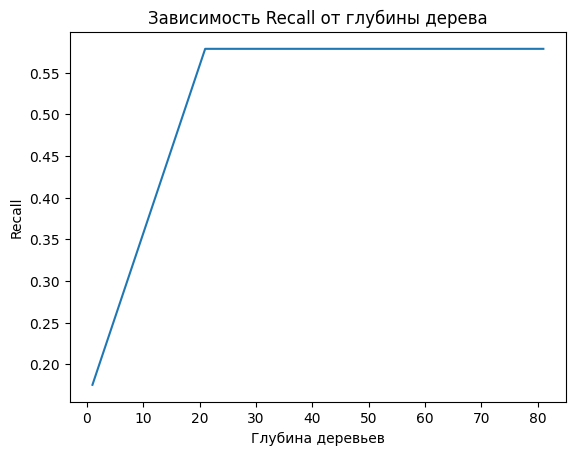

In [19]:

feature_range=range(1,100,20)
res=[]
for depth in feature_range:
    model=RandomForestClassifier(max_depth=depth,random_state=42)
    score=np.mean(cross_val_score(model,X,y,scoring='recall'))
    res.append(score)

plt.xlabel('Глубина деревьев')
plt.ylabel('Recall')
plt.title('Зависимость Recall от глубины дерева')

plt.plot(feature_range,res)
plt.show()

Возьмем максимальную глубину дерева 20

#### Количество подаваемых признаков

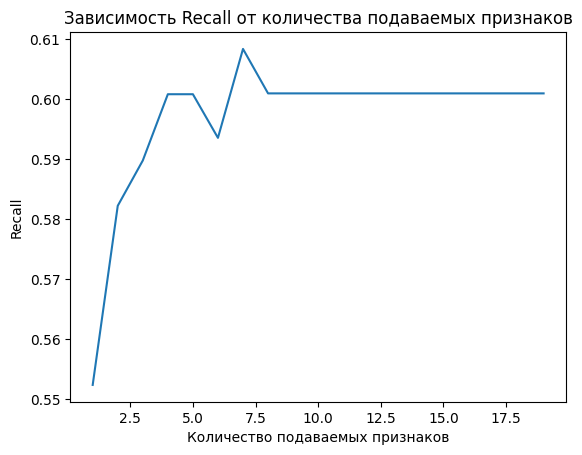

In [20]:
feature_range=range(1,20)
res=[]
for i in feature_range:
    model=RandomForestClassifier(max_depth=20,max_features=i,random_state=42)
    score=np.mean(cross_val_score(model,X,y,scoring='recall'))
    res.append(score)

plt.xlabel('Количество подаваемых признаков')
plt.ylabel('Recall')
plt.title('Зависимость Recall от количества подаваемых признаков')

plt.plot(feature_range,res)
plt.show()

Возьмем значение 7

#### Количество деревьев

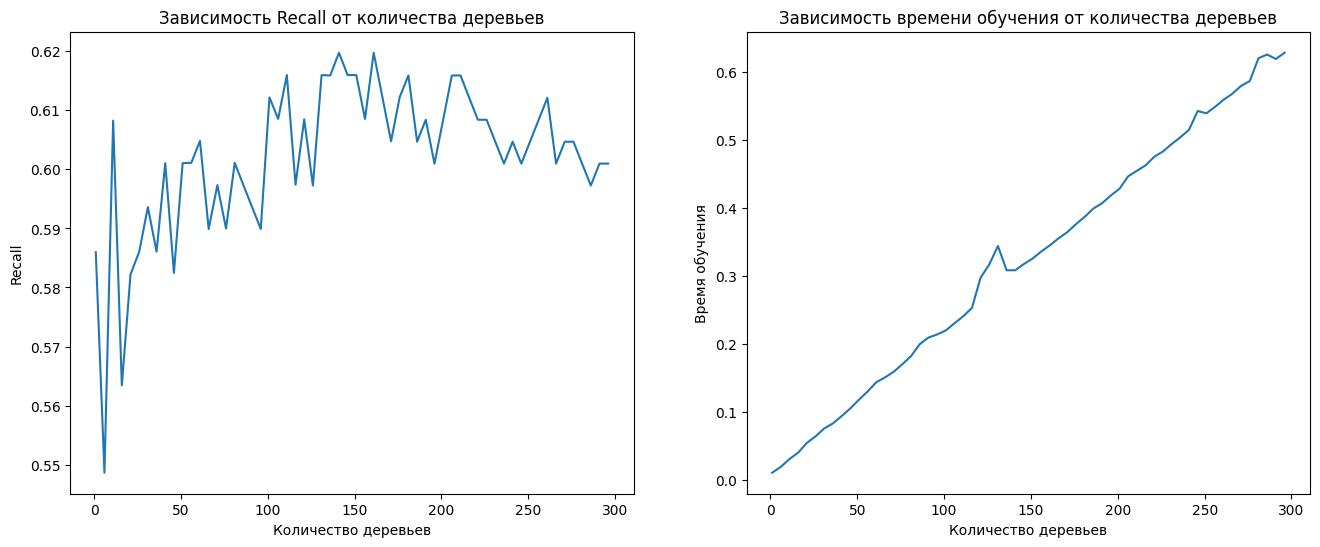

In [24]:
from time import time

fig,axes=plt.subplots(1,2,figsize=(16,6))
feature_range=range(1,300,5)
res=[]
times=[]
for i in feature_range:
    model=RandomForestClassifier(max_depth=20,max_features=7,n_estimators=i,random_state=42)
    start_time=time()
    score=np.mean(cross_val_score(model,X,y,scoring='recall'))
    end_time=time()
    mean_learning_time=(end_time-start_time)/5
    times.append(mean_learning_time)
    res.append(score)

axes[0].set_xlabel('Количество деревьев')
axes[0].set_ylabel('Recall')
axes[0].set_title('Зависимость Recall от количества деревьев')
axes[0].plot(feature_range,res)

axes[1].set_xlabel('Количество деревьев')
axes[1].set_ylabel('Время обучения')
axes[1].set_title('Зависимость времени обучения от количества деревьев')
axes[1].plot(feature_range,times)

plt.show()

Возьмем количество деревьев 140

### XGBClassifier

In [26]:
from xgboost import XGBClassifier

models=[XGBClassifier(random_state=42)]
scorers=[accuracy_score,precision_score,recall_score,f1_score]

X=new_df.copy()
y=X.pop('Outcome')


for model in models:
    print(f"Для модели {model}:")
    for scorer in scorers:
        score=np.mean(cross_val_score(model,X,y,scoring=make_scorer(scorer)))
        print(f'{scorer.__name__} = {score}')

    print('---------------------------')


Для модели XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):
accuracy_score = 0.7409557762498938
precision_score = 0.6362595468391298
recall_score = 0.6046820405310972
f1_score = 0.6180796532975465
---------------------------


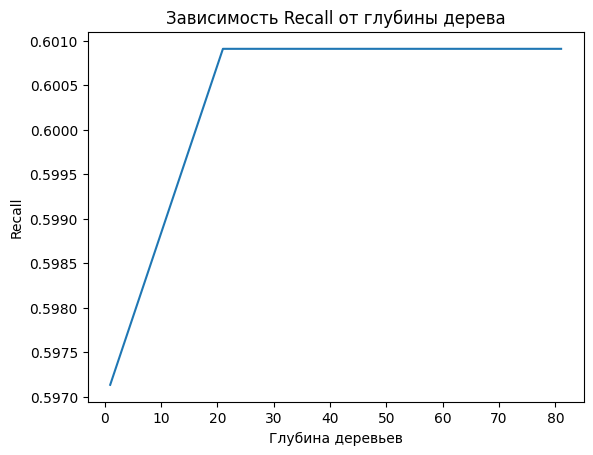

In [27]:
feature_range=range(1,100,20)
res=[]
for depth in feature_range:
    model=XGBClassifier(max_depth=depth,random_state=42)
    score=np.mean(cross_val_score(model,X,y,scoring='recall'))
    res.append(score)

plt.xlabel('Глубина деревьев')
plt.ylabel('Recall')
plt.title('Зависимость Recall от глубины дерева')

plt.plot(feature_range,res)
plt.show()

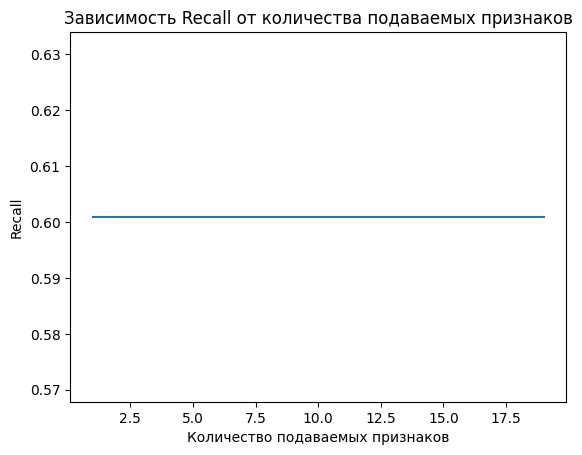

In [28]:
feature_range=range(1,20)
res=[]
for i in feature_range:
    model=XGBClassifier(max_depth=20,max_features=i,random_state=42)
    score=np.mean(cross_val_score(model,X,y,scoring='recall'))
    res.append(score)

plt.xlabel('Количество подаваемых признаков')
plt.ylabel('Recall')
plt.title('Зависимость Recall от количества подаваемых признаков')

plt.plot(feature_range,res)
plt.show()

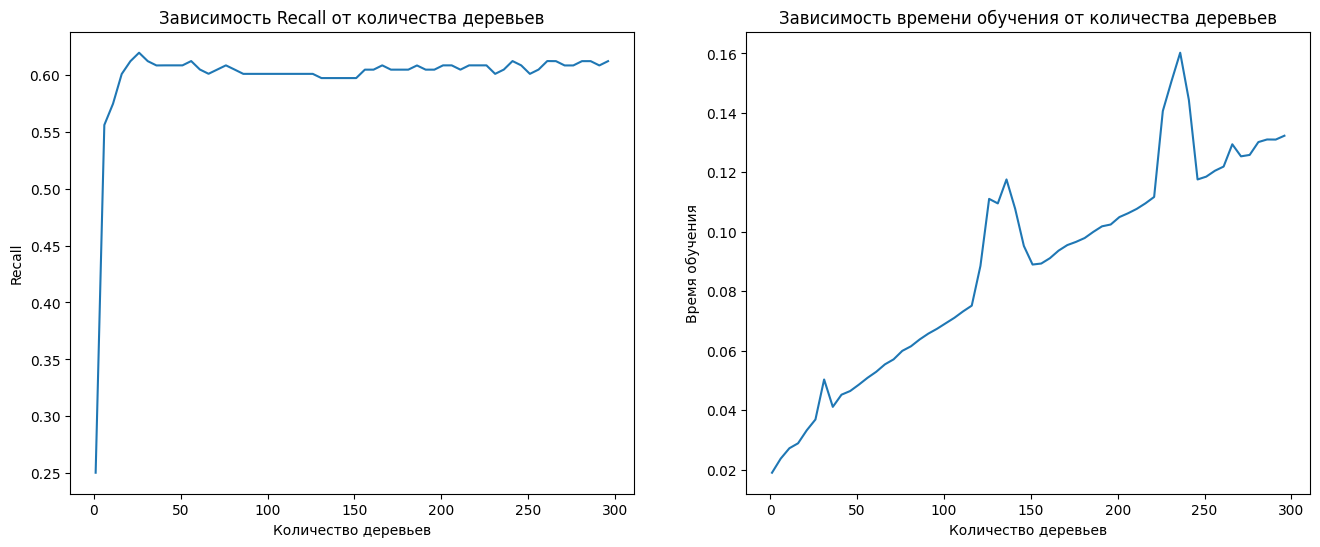

In [30]:
from time import time

fig,axes=plt.subplots(1,2,figsize=(16,6))
feature_range=range(1,300,5)
res=[]
times=[]
for i in feature_range:
    model=XGBClassifier(max_depth=20,max_features=7,n_estimators=i,random_state=42)
    start_time=time()
    score=np.mean(cross_val_score(model,X,y,scoring='recall'))
    end_time=time()
    mean_learning_time=(end_time-start_time)/5
    times.append(mean_learning_time)
    res.append(score)

axes[0].set_xlabel('Количество деревьев')
axes[0].set_ylabel('Recall')
axes[0].set_title('Зависимость Recall от количества деревьев')
axes[0].plot(feature_range,res)

axes[1].set_xlabel('Количество деревьев')
axes[1].set_ylabel('Время обучения')
axes[1].set_title('Зависимость времени обучения от количества деревьев')
axes[1].plot(feature_range,times)

plt.show()

Как видим, XGBClassifier обучается быстрее чем RandomForest, и его точность не так сильно скачет в зависимости от параметров

### Сравнение моделей

In [32]:

models=[XGBClassifier(max_depth=20,max_features=7,n_estimators=35,random_state=42),RandomForestClassifier(max_depth=20,max_features=7,n_estimators=140,random_state=42)]
scorers=[accuracy_score,precision_score,recall_score,f1_score]

X=new_df.copy()
y=X.pop('Outcome')


for model in models:
    print(f"Для модели {model}:")
    for scorer in scorers:
        score=np.mean(cross_val_score(model,X,y,scoring=make_scorer(scorer)))
        print(f'{scorer.__name__} = {score}')

    print('---------------------------')

Для модели XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_features=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=35,
              n_jobs=None, num_parallel_tree=None, ...):
accuracy_score = 0.7409727527374586
precision_score = 0.6447188579331288
recall_score = 0.593361285814116
f1_score = 0.6163001521706606
---------------------------
Для модели RandomForestClassifier(max_depth=20, max_features=7, n_estimat

Вывод: XGBClassifier работает хоть и заметно быстрее, но не так точно